## Project - Seattle Airbnb Dataset  

BY Fabi Daniel

In [4]:
# import all necessary modules

import numpy as np
print('numpy: {}'.format(np.__version__))
import pandas as pd
print('pandas: {}'.format(pd.__version__))
from matplotlib import pyplot as plt
# print('matplotlib: {}'.format(matplotlib.__version__))
import seaborn as sns
print('seaborn: {}'.format(sns.__version__))
%matplotlib inline

numpy: 1.23.1
pandas: 1.4.3
seaborn: 0.11.2


In [5]:
#load dataset

calendar_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/calendar.csv')
listings_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/listings.csv')
reviews_df = pd.read_csv('/Users/cwrealestate/Downloads/archive 2/reviews.csv')

In [6]:
# Get overview of Calendar
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# Get info 
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


* There are Four Columns In calendar_df, 1393570 observations

In [8]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [9]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

* There are 91 columns in listings_df, 3818 observations

In [10]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [11]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


* There are 6 columns in reviews_df, 84849 observations

### Data Assessment


In [12]:
listings_df.sample(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1196,7343707,https://www.airbnb.com/rooms/7343707,20160104002432,2016-01-04,Waterfront View home in Seattle,Full lower level suite with views of the Olymp...,"New large lower suite with 2 bedrooms, 1 den/b...",Full lower level suite with views of the Olymp...,none,30 minute walk to Discovery Park Close to down...,...,10.0,f,NaN,WASHINGTON,t,strict,f,f,1,2.80
1072,9706229,https://www.airbnb.com/rooms/9706229,20160104002432,2016-01-04,Pike Place Market - Art Suite,- Netflix - 1 block from Pike Place Market - 1...,- Downtown Seattle - 1 block from Pike Place M...,- Netflix - 1 block from Pike Place Market - 1...,none,"If you're traveling to Seattle, this is exactl...",...,9.0,f,NaN,WASHINGTON,t,moderate,f,f,2,6.00
1730,9219567,https://www.airbnb.com/rooms/9219567,20160104002432,2016-01-04,Spacious West Seattle house w/views,"Large Craftsman home, sweeping views, close to...",This house was built as a typical Seattle one-...,"Large Craftsman home, sweeping views, close to...",none,This is a quiet neighborhood that is walking d...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
2592,7802266,https://www.airbnb.com/rooms/7802266,20160104002432,2016-01-04,Cap Hill Penthouse Private Room,Epic Capitol Hill penthouse. Location could no...,One of Capitol hill's most impressive bachelor...,Epic Capitol Hill penthouse. Location could no...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,0.24
1371,2186330,https://www.airbnb.com/rooms/2186330,20160104002432,2016-01-04,Downtown Seattle Near Pike Pl! MT2,The Metropolitan Tower property is centrally l...,"AMAZING BUILDING, AMENITIES, AND LOCATION WITH...",The Metropolitan Tower property is centrally l...,none,In the heart of Downtown Seattle! Nearby Attra...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,1.11
156,5042014,https://www.airbnb.com/rooms/5042014,20160104002432,2016-01-04,BALLARD ART,Very lovely and cozy room for one. Convenientl...,Very lovely and cozy room for one. Convenientl...,Very lovely and cozy room for one. Convenientl...,none,"Ballard is lovely, vibrant and one of the most...",...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,1.25
860,9369481,https://www.airbnb.com/rooms/9369481,20160104002432,2016-01-04,Capital hilll Victorian,Centrally located Victorian house close to pik...,NaN,Centrally located Victorian house close to pik...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,3,NaN
168,5143441,https://www.airbnb.com/rooms/5143441,20160104002432,2016-01-04,Seattle Charm,"This charming, comfortable old world apartment...","My home has original, 100 year old wood detail...","This charming, comfortable old world apartment...",none,"I have great food, shops, movie theaters, libr...",...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,2,4.51
2112,6610942,https://www.airbnb.com/rooms/6610942,20160104002432,2016-01-04,Large suite with separate entrance!,This comfortable space is very quiet and full ...,This is a large room with ensuite bathroom. It...,This comfortable space is very quiet and full ...,none,The giant tract of land south of downtown betw...,...,10.0,f,NaN,WASHINGTON,f,flexible,f,f,1,2.64
975,8555794,https://www.airbnb.com/rooms/8555794,20160104002432,2016-01-04,Master Suite in Townhome,Large roomy bedroom with connected bathroom. F...,Very Modern looking space with lots of great a...,Large roomy bedroom with connected bathroom. F...,none,Short drive or bus ride to the heart of Seattl...,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,3,NaN


##### Overview of listings_df

It has 91 columns

In [13]:
# Get an Overview of columns that are float
listings_df.loc[:,(listings_df.dtypes=='float64').values]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,354.0,354.0,47.664295,-122.359170,2.0,3.0,3.0,NaN,80.0,8.0,10.0,4.0,8.0,10.0,8.0,NaN,0.30
3814,1.0,1.0,47.649552,-122.318309,1.0,1.0,2.0,NaN,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2.00
3815,1.0,1.0,47.508453,-122.240607,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,1.0,1.0,47.632335,-122.275530,1.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Get an Overview of columns that are Object
listings_df.loc[:,(listings_df.dtypes=='object').values]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,https://www.airbnb.com/rooms/8101950,2016-01-04,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,NaN,NaN,...,t,2016-01-04,2015-09-27,2015-09-27,f,WASHINGTON,f,strict,f,f
3814,https://www.airbnb.com/rooms/8902327,2016-01-04,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,This is a basement apartment in a newer reside...,Uber and Car2go are good options in Seattle. T...,...,t,2016-01-04,2015-12-18,2015-12-24,f,WASHINGTON,f,moderate,f,f
3815,https://www.airbnb.com/rooms/10267360,2016-01-04,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,moderate,f,f
3816,https://www.airbnb.com/rooms/9604740,2016-01-04,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,NaN,Yes,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,moderate,f,f


In [15]:
listings_df.loc[:,(listings_df.dtypes=='int').values]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,20160104002432,31148752,6,1,3,1125,18,32,32,32,1,8
3814,8902327,20160104002432,46566046,4,3,2,29,6,26,44,273,2,1
3815,10267360,20160104002432,52791370,2,2,1,7,29,59,88,88,0,1
3816,9604740,20160104002432,25522052,2,1,3,1125,30,60,90,179,0,1


In [16]:
listings_df.loc[:,(listings_df.dtypes=='datetime').values]

""
0
1
2
3
4
...
3813
3814
3815
3816


There are no datetime columns in the listings_df. Clever to have separated the datetime. 

In [17]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Due to the Number of columns, working with this table might be cumbersome. I will normalize the listings_df table into smaller tables with id being the key to the relationship

##### Overview of calendar_df

It has four columns

In [18]:
calendar_df.loc[:,(calendar_df.dtypes=='datetime').values]

""
0
1
2
3
4
...
1393565
1393566
1393567
1393568


In [19]:
print(calendar_df.columns)
calendar_df.info()

Index(['listing_id', 'date', 'available', 'price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Column 'date' is not in right datatype

In [20]:
calendar_df.date.dtypes

dtype('O')

##### Overview of review_df

It has six columns

In [21]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


Column 'date' is not in right datatype

#### Data Cleaning and Normalization

Convert date to appropriate datatype

In [22]:
# Convert calendar_df Date
calendar_df['date'] = pd.to_datetime(calendar_df.date, yearfirst=True)
calendar_df['date'].dtypes

dtype('<M8[ns]')

In [23]:
reviews_df['date'] = pd.to_datetime(reviews_df.date, yearfirst=True)
reviews_df['date'].dtypes

dtype('<M8[ns]')

##### Data Normalization

In [24]:
# Normalize for listings_location for locational details

listings_location = listings_df[['id',
'name', 
'description', 
'neighbourhood', 
'city', 
'state', 
'is_location_exact',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude']]

listings_location.shape

(3818, 14)

listings_location has 9 columns 

In [25]:
# Normalize for listings_price for pricing details
listings_price = listings_df[['id', 
'price',
'weekly_price',
'monthly_price',
'security_deposit',
'cleaning_fee']]

listings_price.shape

(3818, 6)

In [26]:
listings_df[['guests_included','extra_people']]


,guests_included,extra_people
0,2,$5.00
1,1,$0.00
2,10,$25.00
3,1,$0.00
4,6,$15.00
...,...,...
3813,1,$0.00
3814,3,$25.00
3815,2,$20.00
3816,1,$0.00


In [27]:
listings_df[['minimum_nights',                    
'maximum_nights',                       
'has_availability',                
'availability_30',                
'availability_60',                    
'availability_90',   
'availability_365']]

,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365
0,1,365,t,14,41,71,346
1,2,90,t,13,13,16,291
2,4,30,t,1,6,17,220
3,1,1125,t,0,0,0,143
4,1,1125,t,30,60,90,365
...,...,...,...,...,...,...,...
3813,3,1125,t,18,32,32,32
3814,2,29,t,6,26,44,273
3815,1,7,t,29,59,88,88
3816,3,1125,t,30,60,90,179


listings_price has 8 columns

In [28]:
# Normalize for listings_bedtails for bedding details

listings_bedtails = listings_df[['id', 
'property_type',
'room_type',
'accommodates',
'bathrooms',
'bedrooms',
'beds',
'bed_type',
'amenities',
'square_feet',
'amenities',
'square_feet']]

listings_bedtails

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,amenities,square_feet
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
3814,8902327,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN
3815,10267360,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN
3816,9604740,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN


listings_bedtails has 8 columns 

In [29]:
listings_hosts = listings_df[['id', 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified']]

listings_hosts.shape

(3818, 19)

listings_hosts has 19 columns

In [30]:
listings_review = listings_df[['id', 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']]


# listings_review
listings_review.shape

(3818, 11)

In [31]:
listings_review.sample(10)

,id,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
3454,8012443,11,2015-08-30,2015-11-19,100.0,10.0,10.0,10.0,10.0,10.0,10.0
668,8847108,11,2015-10-19,2015-12-21,98.0,10.0,10.0,10.0,10.0,10.0,10.0
2293,4461706,28,2015-05-28,2015-11-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2265,7480196,7,2015-08-03,2015-11-09,94.0,9.0,10.0,9.0,9.0,9.0,9.0
1186,8173487,2,2015-09-07,2015-12-01,80.0,10.0,10.0,10.0,9.0,10.0,8.0
2147,4639040,12,2015-01-16,2015-11-29,98.0,10.0,9.0,10.0,10.0,10.0,10.0
625,9300972,1,2015-12-28,2015-12-28,100.0,10.0,8.0,10.0,10.0,8.0,10.0
1178,176678,57,2012-04-10,2015-10-10,97.0,9.0,10.0,10.0,10.0,9.0,10.0
585,9076287,2,2015-11-25,2015-12-21,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1527,1251707,2,2014-04-26,2015-07-01,90.0,8.0,10.0,10.0,10.0,10.0,10.0


listings_review has 11 columns

In [32]:
11+19+8+8+16+23

85

In [33]:
type(list(listings_bedtails.columns))

list

In [34]:

# for x in list2:
#   list1.append(x)



# for x in list2:
#   list1.append(x)

init_listings_col = list(listings_bedtails.columns).extend(listings_hosts.columns.values)
# type(init_listings_col)


# print(init_listings_col)
# for i in :
#     for i in listings_df.columns.to_list:
#     if 

In [35]:
listings_others=listings_df[['guests_included',
'extra_people',
'minimum_nights',
'maximum_nights',
'calendar_updated',
'has_availability',
'availability_30',
'availability_60',
'availability_90',
'availability_365',
'calendar_last_scraped','requires_license',
'license',
'jurisdiction_names',
'instant_bookable',
'cancellation_policy',
'require_guest_profile_picture',
'require_guest_phone_verification',
'calculated_host_listings_count',
'reviews_per_month']]

listings_others.shape

(3818, 20)

### Exploratory Data Analysis

First, I will calculate the occupancy rate of each listings. Occupancy Rate is a very important metric for short stays as it shows how well your apartment is performing, a High Occupancy Rate is consider good.
* To get the Occupancy Rate for each listing, I divide the Number of days the listing was occupied by the total number of days in question
* It is worthy to note that it is possible that listings might not have the same start date. To account for this, I will get the date difference; the difference between date of first instance and date of last instance

In [36]:
# add aggregation by first and last 
df_agg= calendar_df.groupby(['listing_id']).agg({'date':['first','last']})

# Flatten Multiindex
df_agg.columns = df_agg.columns.map('_'.join)


# Convert to Date time
df_agg[['date_first','date_last']] = df_agg[['date_first','date_last']].apply(pd.to_datetime) #if conversion required

# Find Date difference
df_agg['date_diff'] = (df_agg['date_last'] - df_agg['date_first'])
df_agg.sample(10)

,date_first,date_last,date_diff
listing_id,,,
7025898,2016-01-04,2017-01-02,364 days
5299060,2016-01-04,2017-01-02,364 days
5415077,2016-01-04,2017-01-02,364 days
2557712,2016-01-04,2017-01-02,364 days
1499596,2016-01-04,2017-01-02,364 days
5433597,2016-01-04,2017-01-02,364 days
2520890,2016-01-04,2017-01-02,364 days
8035212,2016-01-04,2017-01-02,364 days
7853498,2016-01-04,2017-01-02,364 days


In [37]:
df_agg['date_last'].value_counts()

2017-01-02    3818
Name: date_last, dtype: int64

* All the listings have the same date difference. Now, I can proceed finally to calculating the occupancy rate using 365 days as the denominator

In [38]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [39]:
# Calculate the Occupancy Count i.e. (where 'available' is 't')
occupancy = calendar_df.groupby('listing_id')['available'].apply(lambda x: (x=='t').sum()).reset_index(name='count')

# Create 'occupancy_rate' feature for each Listing.
occupancy['rate'] = (occupancy['count']*100)/365
occupancy.sample(20)

,listing_id,count,rate
355,931758,356,97.534247
2090,6557018,149,40.821918
1048,3535171,365,100.000000
813,2686659,349,95.616438
1946,6216116,226,61.917808
3492,9368517,30,8.219178
2867,8047522,365,100.000000
348,904057,258,70.684932
2048,6448099,42,11.506849
1877,6019762,232,63.561644


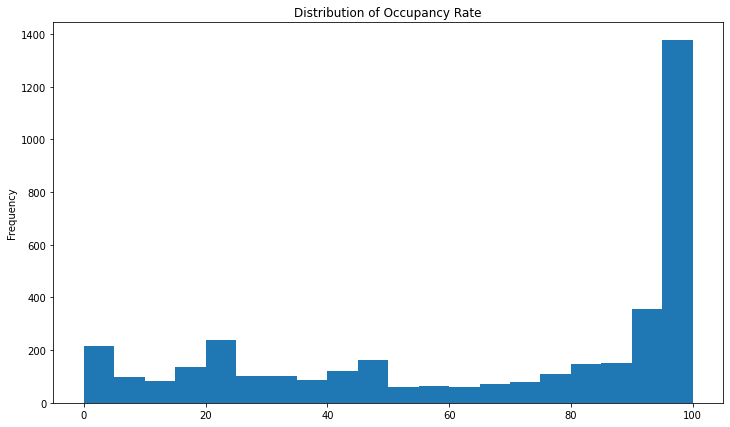

In [40]:
# Get Distribution of occupancy rate
# plt.figure(figsize=(12,7))
plt.rcParams['figure.figsize']=[12,7]
occupancy['rate'].plot(kind='hist', bins=20)
plt.title('Distribution of Occupancy Rate')
plt.show()

Apparently, there are listings with a perfect record i.e. 100% occupancy rate and this group represents the majority 

I will get a table for all listings with a perfect record.

In [41]:
# Get a table of all listings with a perfect record

perfect_rec = occupancy[occupancy['rate'] == 100]
perfect_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678 entries, 1 to 3816
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  678 non-null    int64  
 1   count       678 non-null    int64  
 2   rate        678 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 21.2 KB


There are 678 listings with a perfect record 

I feel pressured to take a deeper dive to understand the characteristics of this particular group

In [42]:
# Check bed details 

listings_bedtails.sample(10)

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,amenities,square_feet
3172,3738724,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",NaN
1585,3793047,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Elev...",NaN
1253,6658052,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN
43,7308567,Apartment,Entire home/apt,3,1.5,1.0,2.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,Hea...",NaN,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,Hea...",NaN
3265,2303981,House,Entire home/apt,8,1.0,3.0,3.0,Real Bed,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN,"{""Cable TV"",""Wireless Internet"",Kitchen,""Free ...",NaN
1229,8956631,Apartment,Entire home/apt,4,1.0,0.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
365,3791920,House,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN
611,9591787,Townhouse,Entire home/apt,9,2.5,3.0,6.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN
759,9976135,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Elevator in Buil...",NaN,"{""Wireless Internet"",Kitchen,""Elevator in Buil...",NaN
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",NaN


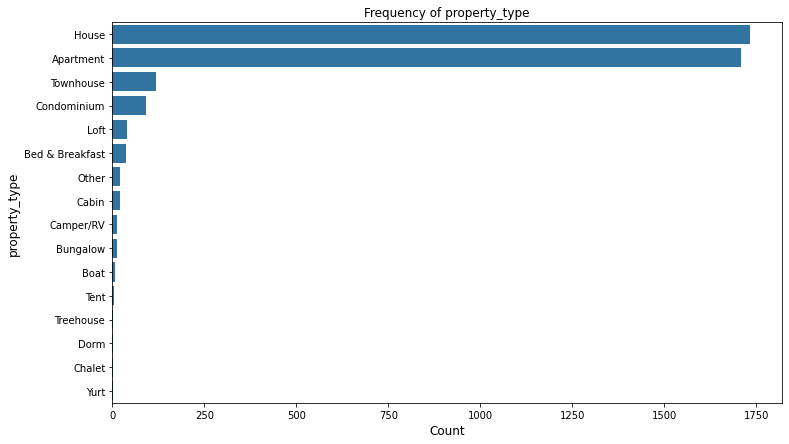

In [43]:

# Plot for Property Type
# Choose color for plot
def count_univ(data, y, color= sns.color_palette()[0]):
    order = data[y].value_counts().index

    sns.countplot(data=data, y=y, color=color, order=order)
    plt.title(f'Frequency of {y}')
    plt.ylabel(f'{y}', fontsize=12)
    plt.xlabel('Count', fontsize=12)
    plt.show()
count_univ(data=listings_bedtails,y='property_type')

In general, There are more houses than any other property type for short stay accommodation in Seattle. Following closely are Apartments.

The Margin for error is not known as it's common for owners when uploading to use a generic term 'House' for the property description



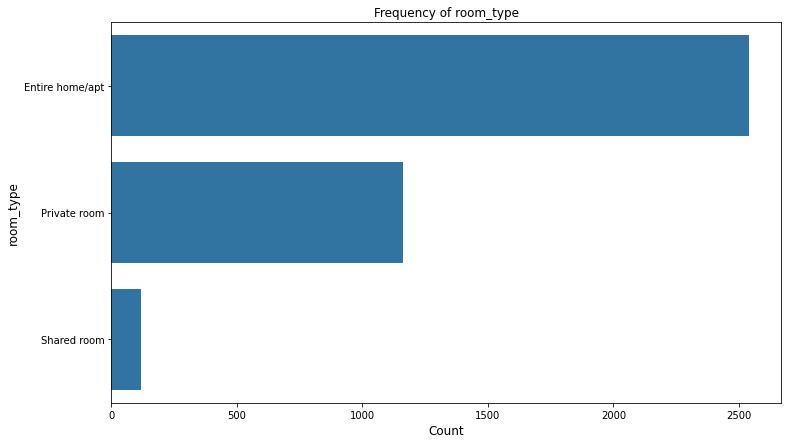

In [44]:
# Plot for Room Type
count_univ(data=listings_bedtails,y='room_type')

As expected there are more listings let out in their entirety that there are shared or private rooms

Next is to check for bedrooms

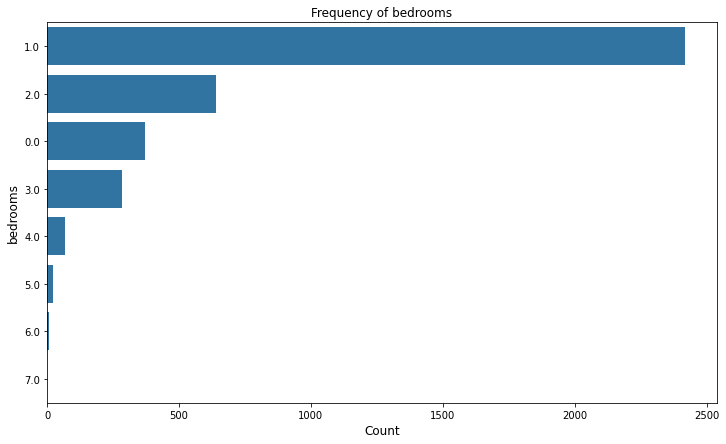

In [45]:
# Plot for Room Type
count_univ(data=listings_bedtails,y='bedrooms')

First thing to note from the visualization is the 0 bedrooms. This could be studio apartment that have both the bedroom and the living area as one single area.

Also, 1-Bedrooms are the most frequent bedroom type, representing majority of the dataset 

Now, merging the listing_bedtails dataframe with my perfect_rec dataframe, I can use these three attributes and see how they are represented in my perfect_rec dataframe

In [46]:
# Merge Bed Details with Perfect record
temp_listings = perfect_rec.merge(listings_bedtails, how='left',left_on='listing_id',right_on='id',suffixes=('', '_drop'))

#Drop the duplicate columns
temp_listings.drop([col for col in temp_listings.columns if 'drop' in col], axis=1, inplace=True)




Plot for bedrooms for listings with Perfect Records

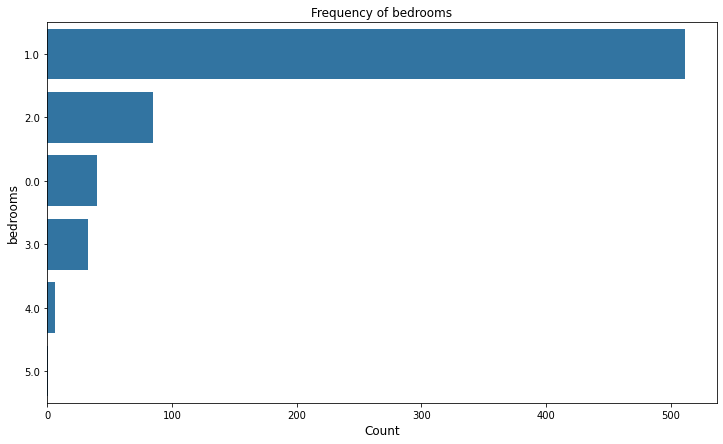

In [47]:
# base_color = sns.color_palette()[0]

# temp_listings.bedrooms.value_counts(normalize=True).plot(kind='bar', color=base_color)
# # plt.xticks(rotation=45)
# temp_listings

# Plot for bedrooms for listings with Perfect Records
count_univ(data=temp_listings,y='bedrooms')

Apart from the fact that there are no 6 or 7 Bedrooms with a Perfect Record. This chart is similar to the one for all listings

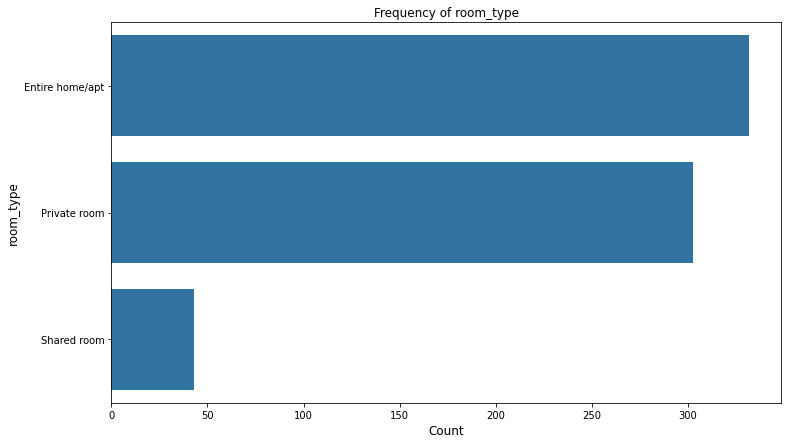

In [48]:
# Plot for Room Type for listings with Perfect Records
count_univ(data=temp_listings,y='room_type')

This is interesting, compared to the chart for all listings, private rooms have a very good representation when it comes to having Perfect Records. 

I would love to see the ratio of Private Rooms with Perfect Records to All Private Rooms

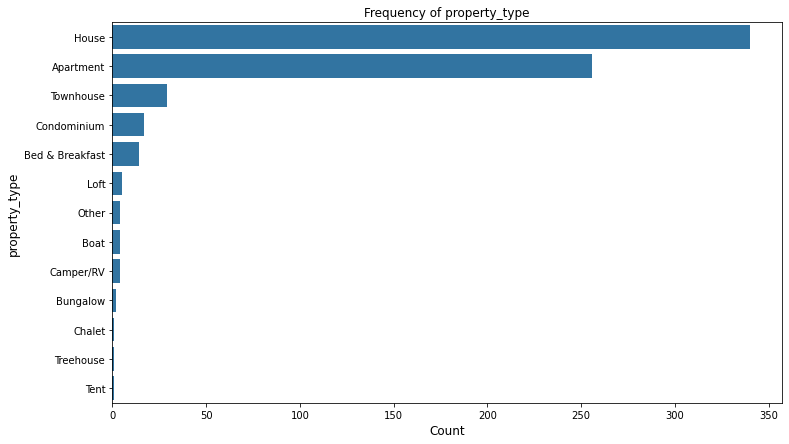

In [49]:
# Plot for Property Type for listings with Perfect Records
count_univ(data=temp_listings,y='property_type')

The gap between the two leading property type has increased.

However, there are still more **Houses** with Perfect Records than any other property type for short stay accommodation in Seattle. Following closely are Apartments.

The Margin for error is not known as it's common for owners when uploading to use a generic term 'House' for the property description



In [51]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [50]:
# df_agg['diff'].value_counts()

KeyError: 'diff'

In [ ]:
# temp_listings = listings_max.merge(listings_bedtails, how='left',left_on='id',right_on='id',suffixes=('', '_drop'))

# #Drop the duplicate columns
# temp_listings.drop([col for col in temp_listings.columns if 'drop' in col], axis=1, inplace=True)

# base_color = sns.color_palette()[0]

# temp_listings.beds.value_counts(normalize=True).plot(kind='bar', color=base_color)
# # plt.xticks(rotation=45)
# # temp_listings


In [ ]:
reviews_df.sample(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
46455,241032,6022574,2013-07-27,5153064,David,Everything could not have been easier! The apa...
42462,769213,9852006,2014-01-14,10477266,Brett,An amazing little space in an amazing little n...
10292,1900698,17956956,2014-08-19,1416394,Calvin,Julie's place was great! She left specific arr...
12728,193836,9826480,2014-01-13,8270311,Warren,We came back for a second stay and things were...
26604,1758935,23730886,2014-12-08,19218821,Florian,It was our first time using airbnb and it coul...
69559,430610,2292919,2012-09-14,2887384,Karyn,5 of us stayed at Seth's beautiful home. It wa...
2083,4569115,48735054,2015-09-28,4397812,Liz (& Kelvin),The apartment was very comfortable and in an i...
49442,609701,3750573,2013-03-11,2130419,Matt,This is hands down one of the best places I've...
73419,2976798,53957523,2015-11-15,31681291,Kathleen,Patricia is an outstanding Airbnb host. The n...
56144,53867,21806629,2014-10-24,22571243,Nancy Lynn,The backyard cottage was excellent for my few ...


In [ ]:
reviews_count = reviews_df.groupby('listing_id')['listing_id'].count().sort_values(ascending=False).reset_index(name='review_count')

In [ ]:
reviews_count

,listing_id,review_count
0,208356,474
1,365550,466
2,25002,404
3,47196,353
4,63308,320
...,...,...
3186,6292452,1
3187,6305798,1
3188,8080939,1
3189,8081658,1


In [ ]:
# occupancy_review = occupancy.merge(reviews_count, how='left',left_on='listing_id',right_on='listing_id',suffixes=('', '_drop'))


# x= occupancy_review['review_count']
# y = occupancy_review['rate']

# bins = np.arange(x.min(),x.max(),0.5)
# sns.regplot(data=occupancy_review, x=x, y=y,scatter_kws={'alpha': 1/20}, bins=bins)

TypeError: regplot() got an unexpected keyword argument 'bins'

Apparently, there are listings with a perfect record. The distribution is rightly skewed, more than 60% of the listings with a perfect record are 1-bedroom and the number decrease as the beds increases

In [53]:
calendar_df

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


In [54]:
calendar_df['month_year'] = pd.to_datetime(calendar_df['date']).dt.to_period('M')
calendar_df.head()

,listing_id,date,available,price,month_year
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01
3,241032,2016-01-07,f,NaN,2016-01
4,241032,2016-01-08,f,NaN,2016-01


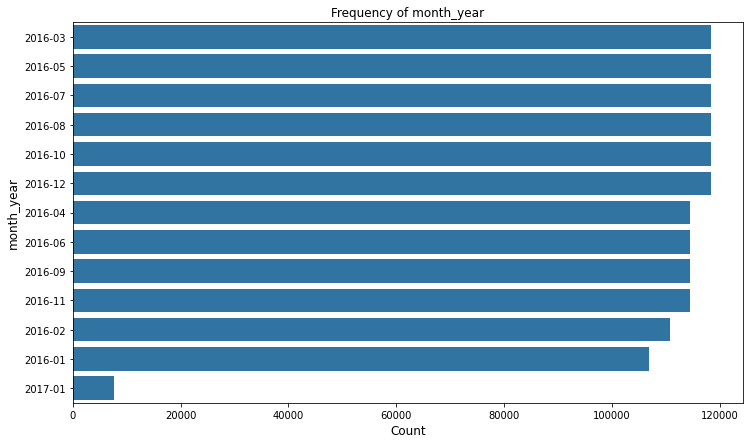

In [62]:
count_univ(data=calendar_df, y='month_year')

In [65]:
calendar_df

,listing_id,date,available,price,month_year
0,241032,2016-01-04,t,$85.00,2016-01
1,241032,2016-01-05,t,$85.00,2016-01
2,241032,2016-01-06,f,NaN,2016-01
3,241032,2016-01-07,f,NaN,2016-01
4,241032,2016-01-08,f,NaN,2016-01
...,...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN,2016-12
1393566,10208623,2016-12-30,f,NaN,2016-12
1393567,10208623,2016-12-31,f,NaN,2016-12
1393568,10208623,2017-01-01,f,NaN,2017-01


In [66]:
# Merge Bed Details with Perfect record
temp_listings = occupancy.merge(calendar_df, how='left',left_on='listing_id',right_on='listing_id',suffixes=('', '_drop'))

#Drop the duplicate columns
temp_listings.drop([col for col in temp_listings.columns if 'drop' in col], axis=1, inplace=True)





In [78]:
temp_listings


,listing_id,count,rate,date,available,price,month_year
0,3335,309,84.657534,2016-01-04,f,NaN,2016-01
1,3335,309,84.657534,2016-01-05,f,NaN,2016-01
2,3335,309,84.657534,2016-01-06,f,NaN,2016-01
3,3335,309,84.657534,2016-01-07,f,NaN,2016-01
4,3335,309,84.657534,2016-01-08,f,NaN,2016-01
...,...,...,...,...,...,...,...
1393565,10340165,358,98.082192,2016-12-29,t,$43.00,2016-12
1393566,10340165,358,98.082192,2016-12-30,t,$43.00,2016-12
1393567,10340165,358,98.082192,2016-12-31,t,$43.00,2016-12
1393568,10340165,358,98.082192,2017-01-01,t,$43.00,2017-01


In [81]:
temp_listings.groupby('month_year')['rate'].mean()

month_year
2016-01    67.061002
2016-02    67.061002
2016-03    67.061002
2016-04    67.061002
2016-05    67.061002
2016-06    67.061002
2016-07    67.061002
2016-08    67.061002
2016-09    67.061002
2016-10    67.061002
2016-11    67.061002
2016-12    67.061002
2017-01    67.061002
Freq: M, Name: rate, dtype: float64